#Exercise: Fashion-MNIST with SGDClassifier (20-30 min)

In 20-30 minutes, do the following:
- Load Fashion-MNIST using `fetch_openml('Fashion-MNIST', as_frame=False)`
- Visualize a few images with their labels
- Split into train/test using slicing (no sklearn splitter)
- Train a multi-class `SGDClassifier`
- Evaluate with confusion matrix, precision, recall, F1-score


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Reproducibility
SEED = 42
np.random.seed(SEED)

# Label mapping
LABEL_MAPPING = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

In [ ]:
def show_samples(X_images, y, rows=3, cols=4, title="Fashion-MNIST samples"):
    """Displays a grid of random Fashion-MNIST images with their labels.

    Args:
        X_images (np.ndarray): Array of image data, expected to be 2D (height, width).
        y (np.ndarray): Array of corresponding labels.
        rows (int): Number of rows in the display grid.
        cols (int): Number of columns in the display grid.
        title (str): Title for the plot.

    Returns:
        None: The function displays a plot.
    """
    idx = np.random.permutation(len(X_images))[: rows * cols]
    fig, axes = plt.subplots(rows, cols, figsize=(1.8 * cols, 1.8 * rows))
    axes = np.asarray(axes).reshape(rows, cols)
    for k, ax in enumerate(axes.ravel()):
        ax.imshow(X_images[idx[k]], cmap="gray")
        ax.set_title(LABEL_MAPPING[int(y[idx[k]])], fontsize=9)
        ax.axis("off")
    fig.suptitle(title)
    fig.tight_layout()
    plt.show()


def plot_cm(cm):
    """Plots a confusion matrix.

    Args:
        cm (np.ndarray): The confusion matrix to plot.

    Returns:
        None: The function displays a plot.
    """
    plt.figure(figsize=(8, 7))
    plt.imshow(cm, cmap="Blues")
    plt.title("Confusion Matrix (counts)")
    plt.colorbar()
    ticks = np.arange(10)
    plt.xticks(ticks, [LABEL_MAPPING[i] for i in ticks], rotation=45, ha="right")
    plt.yticks(ticks, [LABEL_MAPPING[i] for i in ticks])
    plt.xlabel("Predicted")
    plt.ylabel("True")

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

    plt.tight_layout()
    plt.show()

def plot_label_hist(y, title="Label distribution"):
    """Plots the distribution of labels in a dataset.

    Args:
        y (np.ndarray): Array of labels.
        title (str): Title for the plot.

    Returns:
        None: The function displays a plot.
    """
    counts = np.bincount(y.astype(int), minlength=10)
    xs = np.arange(10)
    plt.figure(figsize=(7.5, 3.2))
    plt.bar(xs, counts, color="#4C78A8")
    plt.xticks(xs, [LABEL_MAPPING[i] for i in xs], rotation=45, ha="right")
    plt.ylabel("Count")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Task 1 — Load the dataset (what & why)

What to do
- Use `fetch_openml('Fashion-MNIST', as_frame=False)` to download the dataset.
- Extract `X = data` and `y = target`; cast `y` to integers (0–9).
- Normalize `X` to `[0, 1]` by dividing by 255.0.
- For visualization only, reshape `X` to `(-1, 28, 28)`; keep the flat representation for training.

Why
- Casting to `int` avoids string-label issues and aligns with the label map.
- Normalization makes features comparable and often improves linear models; we
keep it simple by avoiding additional feature standardization steps.
- Visualization expects 2D images, not flattened vectors.

In [ ]:
# Task 1 — Load the Fashion-MNIST dataset
# TODO: Load using fetch_openml, then extract X (data) and y (target)
fashion_mnist = fetch_openml(name="Fashion-MNIST", as_frame=False)
X, y = fashion_mnist.data, fashion_mnist.target

# TODO: Ensure y is integer-coded (0..9)
y = y.astype(int)

# TODO: Normalize pixel intensities to [0, 1]
X = X.astype(np.float32) / 255.0

# For visualization only (X is flat 784; reshape to 28x28 images)
X_images = X.reshape(-1, 28, 28)
print(f"Loaded: X={X.shape}, y={y.shape}")

Loaded: X=(70000, 784), y=(70000,)


# Task 2 — Visualize samples (what & why)

What to do
- Plot a small grid of random images with class names using `show_samples`.
- Plot the label distribution using `plot_label_hist`

Why
- Quick sanity check to verify that images render correctly and labels make sense before you train a model.

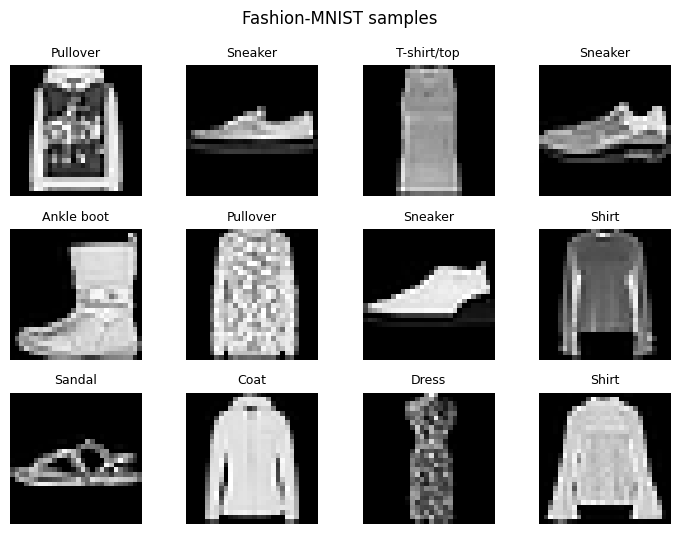

In [ ]:
# Task 2 — Visualize a few samples
show_samples(X_images, y, rows=3, cols=4)

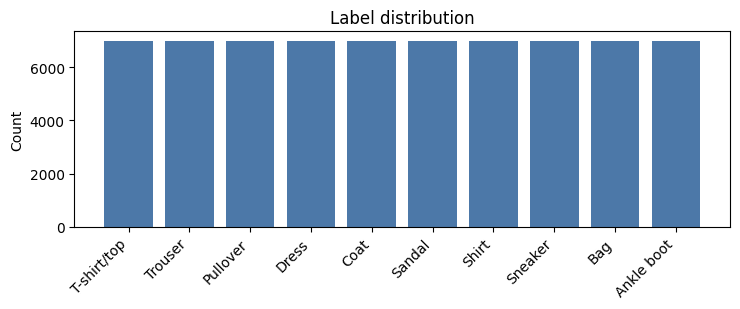

In [ ]:
#Task 2.1 - Plot the label distribution
plot_label_hist(y)

# Task 3 — Split by slicing (what & why)

What to do
- Use slicing to split the dataset: first 60,000 samples for training, last 10,000 for testing.

Why
- Reproduces the conventional Fashion‑MNIST split deterministically without extra APIs.

In [ ]:
# Task 3 — Train/test split (by slicing)
# TODO: Use slicing to split: first 60_000 samples for training, last 10_000 for testing
X_train, y_train = X[:60000], y[:60000]
X_test,  y_test  = X[60000:], y[60000:]
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (60000, 784), Test: (10000, 784)


# Task 4 — Train a linear classifier (what & why)

What to do
- Initialize `SGDClassifier(random_state=SEED)` and fit on the training set.

Why
- SGD trains a linear multi-class model efficiently (one‑vs‑rest under the hood).

In [ ]:
# Task 4 — Train SGDClassifier (multiclass)
# TODO: Initialize and fit the classifier; start with default params
sgd = SGDClassifier(random_state=SEED)
sgd.fit(X_train, y_train)

SGDClassifier(random_state=42)

# Task 5 — Evaluate (what & why)

What to do
- Predict on the test set and compute:
- Confusion matrix
- Precision, recall, F1-score (macro‑averaged)
- Plot the confusion matrix to inspect per‑class behavior.

Why
- The confusion matrix shows where classes are confused (e.g., Shirt vs T‑shirt/top). Macro averages treat all classes equally and summarize overall performance when classes are roughly balanced.

Averaging (how the single numbers are computed)
- micro: aggregate TP/FP/FN over all classes first; for multi-class, this equals accuracy.
- macro: compute the metric per class, then take the unweighted mean. Treats all classes equally and exposes weak classes.
- weighted: like macro, but each class is weighted by its support (number of true examples). Similar to accuracy when classes are imbalanced.

In Fashion‑MNIST (roughly balanced), macro is a good default summary.

Why averaging is needed in multiclass (vs. binary)
- Binary metrics assume a single “positive” class; you get one precision, recall, and F1 defined relative to that class.
- In multiclass there is no single positive class. We compute per‑class one‑vs‑rest metrics and must combine them, hence an averaging choice (micro/macro/weighted) to produce a single summary number.
- Different averages reflect different goals: overall correctness (micro), equal attention to each class (macro), or class‑frequency emphasis (weighted).

Precision (macro): 0.8347
Recall    (macro): 0.8310
F1-score  (macro): 0.8306


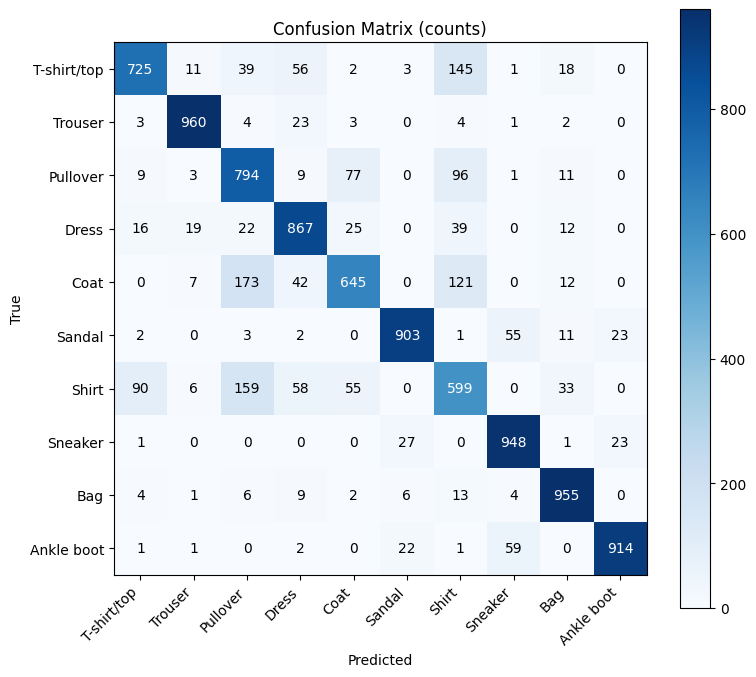

In [ ]:
# Task 5 — Evaluate on test set
# TODO: Get predictions and compute metrics
y_pred = sgd.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
rec = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print(f"Precision (macro): {prec:.4f}")
print(f"Recall    (macro): {rec:.4f}")
print(f"F1-score  (macro): {f1:.4f}")

plot_cm(cm)

# Task 6 — Open task (explore other models)

What to do
- Check scikit-learn documentation and try a different classifier, e.g.:
- Linear SVM: `sklearn.svm.LinearSVC`
- Logistic Regression: `sklearn.linear_model LogisticRegression`
- Random Forest: `sklearn.ensemble.RandomForestClassifier`
- Train on the same training split and evaluate on the same test set using the metrics above.

Precision (macro): 0.8077
Recall    (macro): 0.8089
F1-score  (macro): 0.8079


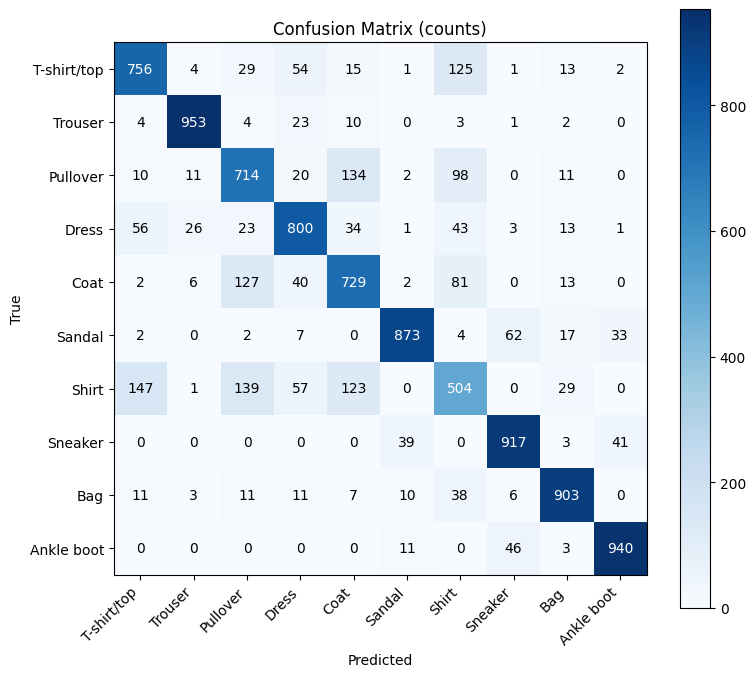

In [ ]:
# Task 6 — Try another classifier (example starter)
# TODO: Replace `LinearSVC` with another model if you prefer; adjust subset size
from sklearn.svm import LinearSVC

n_subset = 10000  # TODO: increase or remove to use the full training set
X_sub, y_sub = X_train[:n_subset], y_train[:n_subset]

alt_clf = LinearSVC(random_state=SEED)
alt_clf.fit(X_sub, y_sub)

y_pred_alt = alt_clf.predict(X_test)
cm_alt = confusion_matrix(y_test, y_pred_alt)

print(f"Precision (macro): {precision_score(y_test, y_pred_alt, average='macro'):.4f}")
print(f"Recall    (macro): {recall_score(y_test, y_pred_alt, average='macro'):.4f}")
print(f"F1-score  (macro): {f1_score(y_test, y_pred_alt, average='macro'):.4f}")
plot_cm(cm_alt)